In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import  warnings

warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('./used_cars_data.csv')
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4


In [7]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset")

There are 7252 rows and 14 columns in the dataset


In [8]:
data.sample(n=10, random_state=1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
2397,Kolkata,2016,21460.0,Petrol,Manual,First,5.0,9.470,6.00,17.00,1497.0,121.36,ford,ecosport
6218,Kolkata,2013,48000.0,Diesel,Manual,First,5.0,7.880,NaN,23.40,1248.0,74.00,maruti,swift
6737,Mumbai,2015,59500.0,Petrol,Manual,First,7.0,13.580,NaN,17.30,1497.0,117.30,honda,mobilio
3659,Delhi,2015,27000.0,Petrol,Automatic,First,5.0,9.600,5.95,19.00,1199.0,88.70,honda,jazz
4513,Bangalore,2015,19000.0,Diesel,Automatic,Second,5.0,69.675,38.00,16.36,2179.0,187.70,jaguar,xf
599,Coimbatore,2019,40674.0,Diesel,Automatic,First,7.0,28.050,24.82,11.36,2755.0,171.50,toyota,innova
186,Bangalore,2014,37382.0,Diesel,Automatic,First,5.0,86.970,32.00,13.00,2143.0,201.10,mercedes-benz,e-class
305,Kochi,2014,61726.0,Diesel,Automatic,First,5.0,67.100,20.77,17.68,1968.0,174.33,audi,a6
4581,Hyderabad,2013,105000.0,Diesel,Automatic,First,5.0,44.800,19.00,17.32,1968.0,150.00,audi,q3
6616,Delhi,2014,55000.0,Diesel,Automatic,First,5.0,49.490,NaN,11.78,2143.0,167.62,mercedes-benz,new


In [9]:
df = data.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   New_Price          7252 non-null   float64
 8   Price              6019 non-null   float64
 9   mileage_num        7169 non-null   float64
 10  engine_num         7206 non-null   float64
 11  power_num          7077 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 793.3+ KB


In [11]:
df.duplicated().sum()   

2

In [12]:
df[df.duplicated(keep=False) == True]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
3623,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
4781,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
6940,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city
7077,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city


In [13]:
df.drop(4781, inplace=True)
df.drop(6940, inplace=True)

In [14]:
# checking for duplicate values
df.duplicated().sum()

0

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

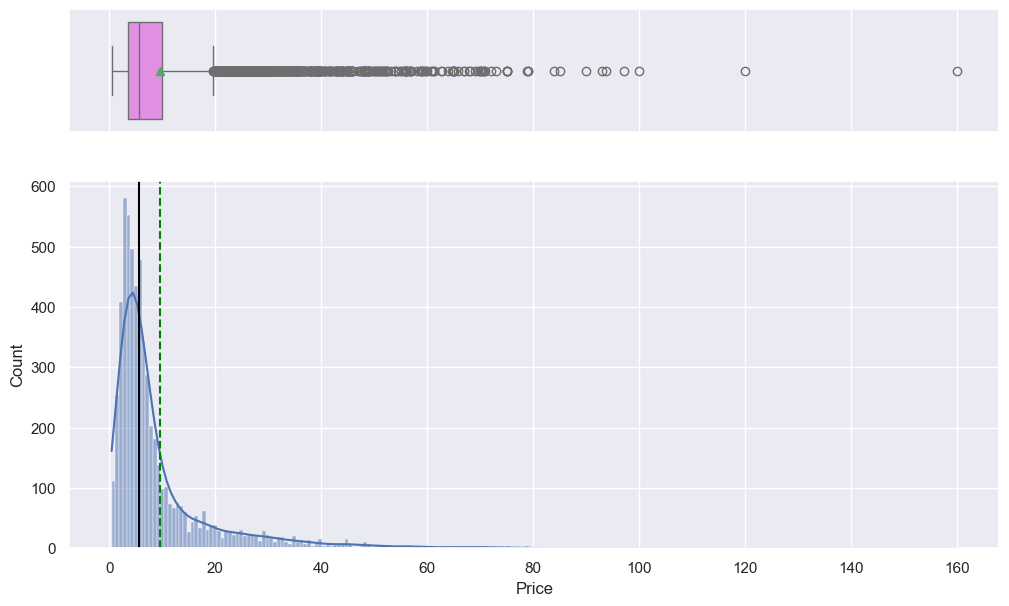

In [19]:
histogram_boxplot(df, "Price", kde=True)

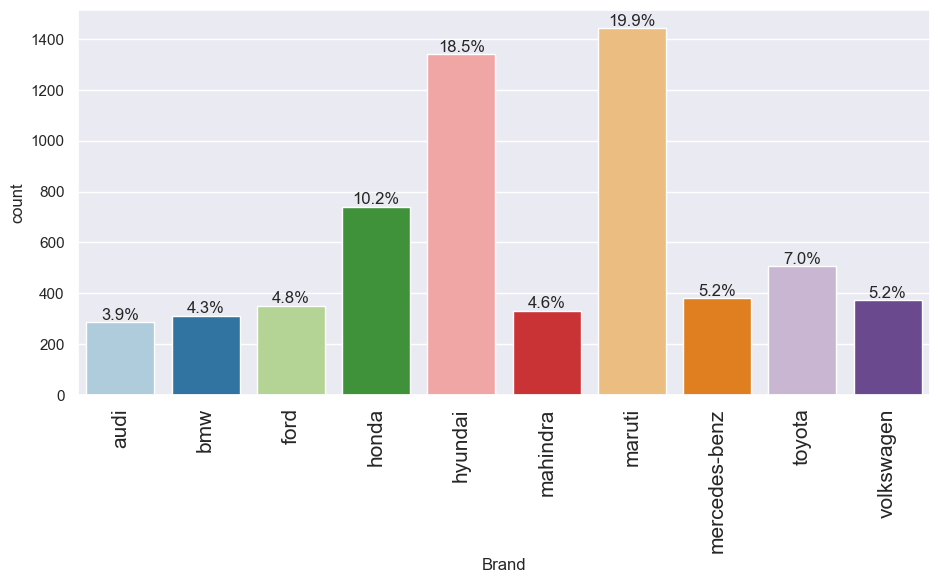

In [21]:
labeled_barplot(df, "Brand", perc=True, n=10)

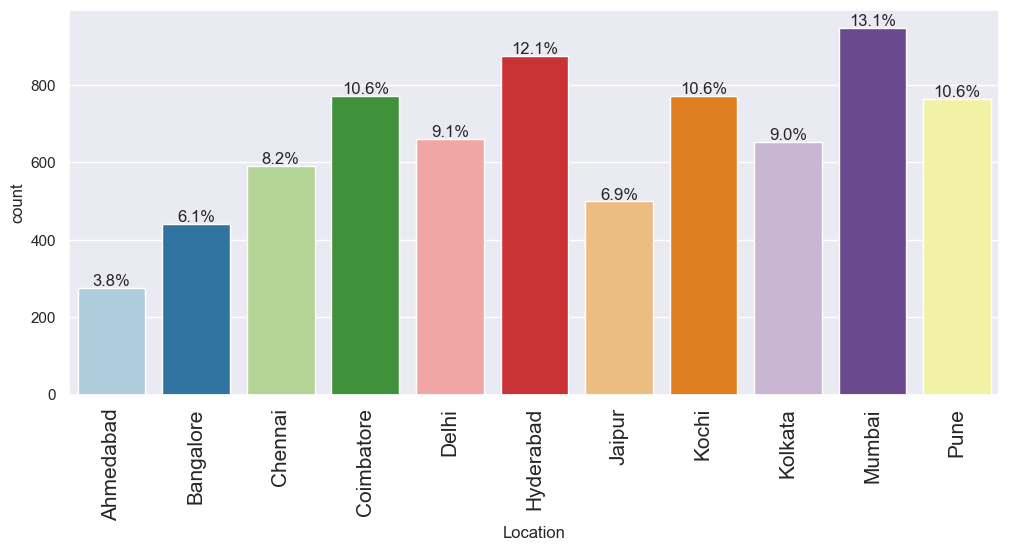

In [22]:
labeled_barplot(df, "Location", perc=True)

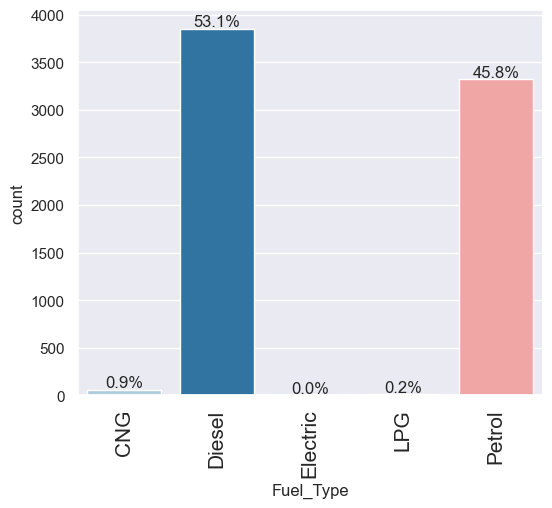

In [23]:
labeled_barplot(df, "Fuel_Type", perc=True)

Bivariate Analysis

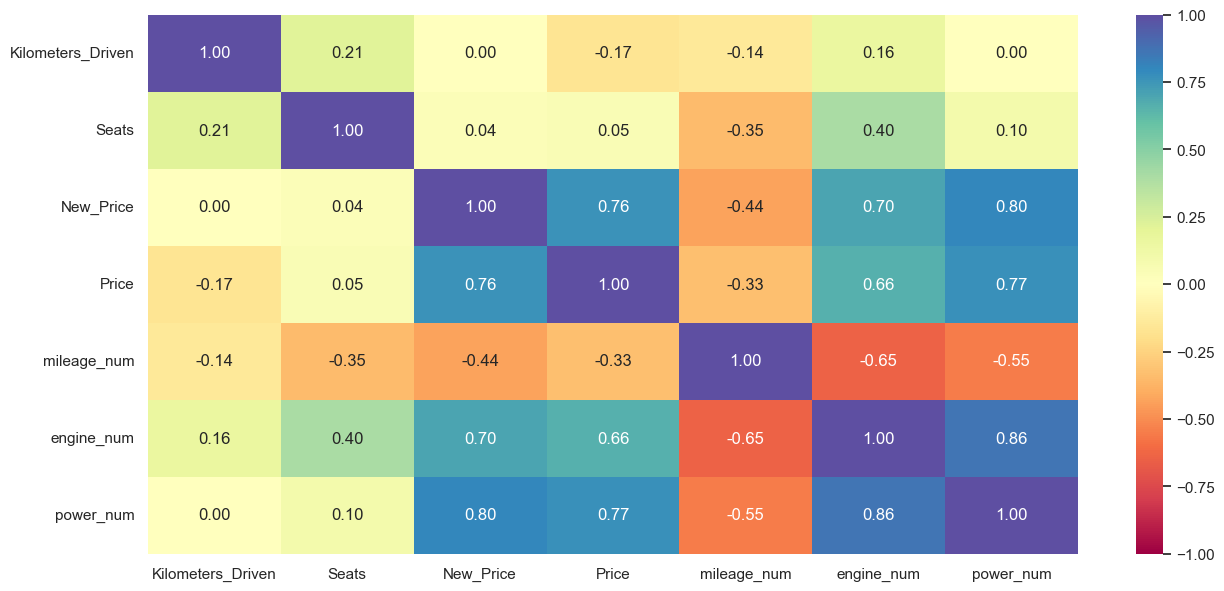

In [25]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
cols_list.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

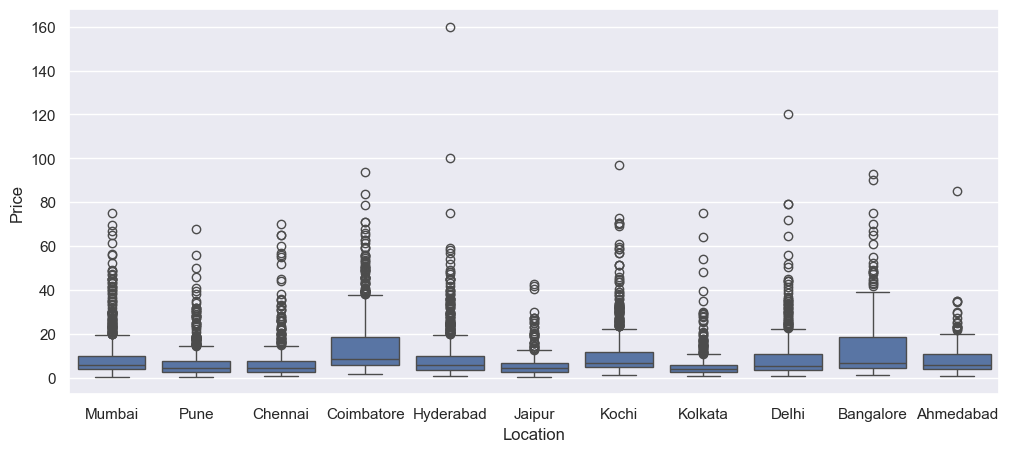

In [27]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df)
plt.show()

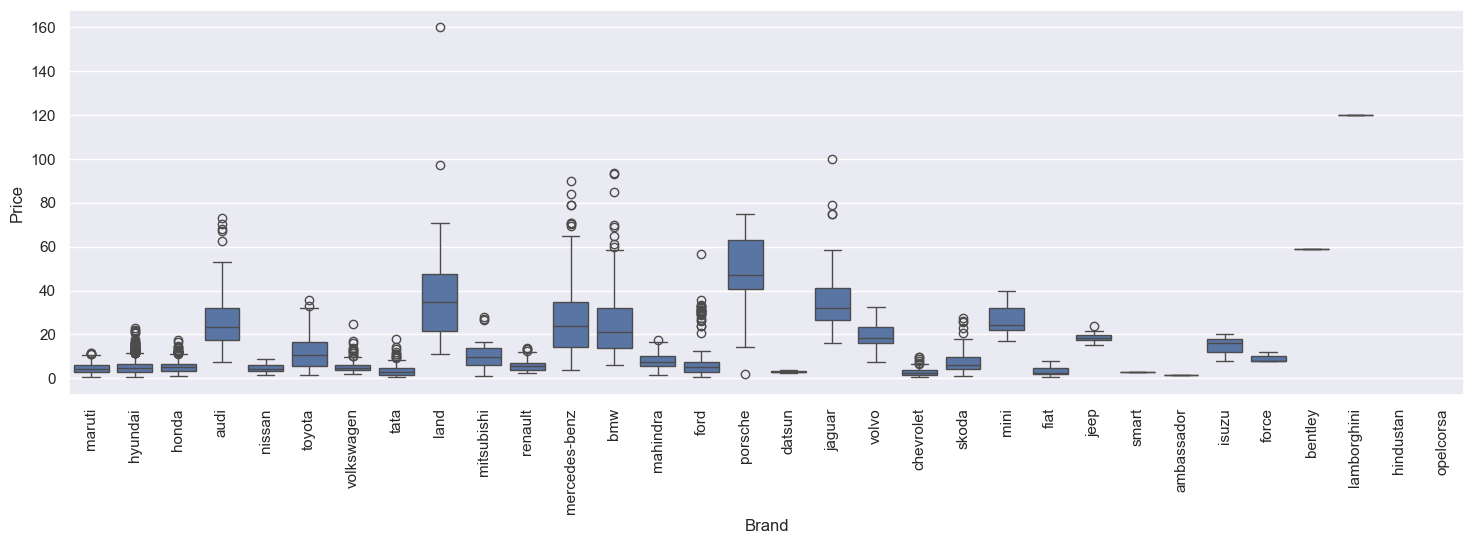

In [28]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

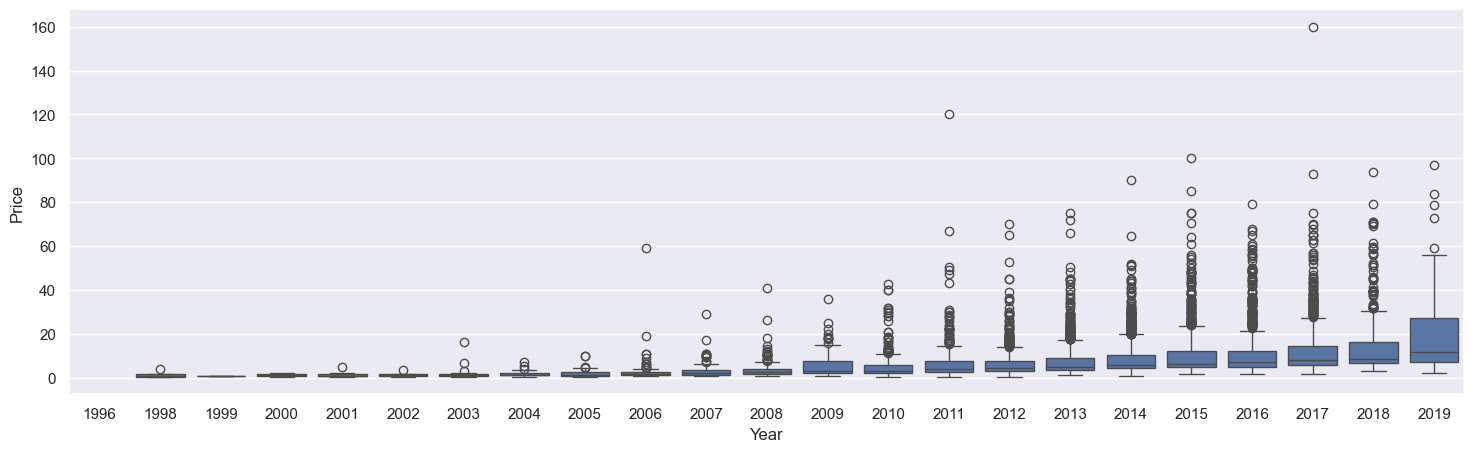

In [29]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df)
plt.show()

In [30]:
# let's check again for missing values
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       1
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price               0
Price                1232
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

In [31]:
df[df["Seats"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
194,Ahmedabad,2007,60006.0,Petrol,Manual,First,NaN,13.580,2.95,NaN,NaN,NaN,honda,city
208,Kolkata,2010,42001.0,Petrol,Manual,First,NaN,7.880,2.11,16.10,NaN,NaN,maruti,swift
229,Bangalore,2015,70436.0,Diesel,Manual,First,NaN,7.650,3.60,NaN,1498.0,99.0,ford,figo
733,Chennai,2006,97800.0,Petrol,Manual,Third,NaN,7.880,1.75,16.10,NaN,NaN,maruti,swift
749,Mumbai,2008,55001.0,Diesel,Automatic,Second,NaN,120.000,26.50,NaN,NaN,NaN,land,rover
1294,Delhi,2009,55005.0,Petrol,Manual,First,NaN,13.580,3.20,12.80,NaN,NaN,honda,city
1327,Hyderabad,2015,50295.0,Petrol,Manual,First,NaN,7.880,5.80,16.10,NaN,NaN,maruti,swift
1385,Pune,2004,115000.0,Petrol,Manual,Second,NaN,13.580,1.50,NaN,NaN,NaN,honda,city
1460,Coimbatore,2008,69078.0,Petrol,Manual,First,NaN,120.000,40.88,NaN,NaN,NaN,land,rover
1917,Jaipur,2005,88000.0,Petrol,Manual,Second,NaN,13.580,1.70,13.00,1493.0,100.0,honda,city


In [32]:
df.groupby(["Brand","Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [33]:
# imputing missing values in Seats
df["Seats"] = df.groupby(["Brand","Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [34]:
# Checking missing values in Seats
df[df["Seats"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
2369,Chennai,2008,56000.0,Petrol,Manual,Second,NaN,7.88,1.50,19.5,1061.0,NaN,maruti,estilo
3882,Kolkata,2010,40000.0,Petrol,Manual,Second,NaN,7.88,2.50,19.5,1061.0,NaN,maruti,estilo
5893,Chennai,2008,51000.0,Petrol,Manual,Second,NaN,7.88,1.75,19.5,1061.0,NaN,maruti,estilo


In [35]:
df["Seats"] = df["Seats"].fillna(5.0)

In [36]:
cols_list = ["Kilometers_Driven","mileage_num", "engine_num", "power_num"]


for col in cols_list:
    df[col] = df.groupby(["Brand", "Model"])[col].transform(
        lambda x: x.fillna(x.median())
    )

df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1232
mileage_num             9
engine_num              0
power_num              12
Brand                   0
Model                   0
dtype: int64

In [37]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand"])[col].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1232
mileage_num             1
engine_num              0
power_num               2
Brand                   0
Model                   0
dtype: int64

In [38]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1232
mileage_num             0
engine_num              0
power_num               0
Brand                   0
Model                   0
dtype: int64

In [39]:
# considering only the data points where price is not missing
df = df[df["Price"].notna()].copy()

# checking for missing values
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
New_Price            0
Price                0
mileage_num          0
engine_num           0
power_num            0
Brand                0
Model                0
dtype: int64

In [41]:
num_to_display = 10
# encode the categorical variables
for col in df.select_dtypes(include="object").columns.tolist():
   val_counts = df[col].value_counts()
   print(val_counts[:num_to_display])
   if val_counts.nunique() > num_to_display:
       print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
   print("-" * 50, "\n")  # just for more space in between

Location
Mumbai        790
Hyderabad     741
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: count, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Fuel_Type
Diesel      3205
Petrol      2745
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64
-------------------------------------------------- 

Transmission
Manual       4298
Automatic    1720
Name: count, dtype: int64
-------------------------------------------------- 

Owner_Type
First             4928
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64
-------------------------------------------------- 

Brand
maruti           1210
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi 

In [49]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [42]:
# defining the dependent and independent variables
X = df.drop(["Price"], axis=1)
y = df["Price"]

In [43]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,72000.0,5.0,5.51,26.60,998.0,58.16,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [44]:
X.shape

(6018, 264)

In [46]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4212
Number of rows in test data = 1806


In [48]:
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression()

In [53]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = model_performance_regression(
    lin_reg_model1, x_train, y_train
)
lin_reg_model1_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.177332,2.24432,0.86575,0.856771


In [51]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model1_perf_test = model_performance_regression(lin_reg_model1, x_test, y_test)
lin_reg_model1_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.305989,2.387192,0.83718,0.809286


In [54]:
# defining the dependent and independent variables
X = df.drop(["Price", "Model"], axis=1)
y = df["Price"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4212
Number of rows in test data = 1806


In [55]:
# fitting a linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression()

In [56]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,5.373312,2.885274,0.777874,0.774988


In [57]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.708771,2.758357,0.805295,0.799291
